In [170]:
import pandas as pd
import numpy as np

# import glob

# # Use glob to get all CSV files in a folder
# csv_files = glob.glob("*.csv")

# # Create an empty list to store the DataFrames
# dataframes = []

# # Loop through the list of files and read each one
# for file in csv_files:
#     df = pd.read_csv(file)
#     dataframes.append(df)

# # Concatenate all DataFrames in the list
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Optionally, save the combined DataFrame to a new CSV file
# combined_df.to_csv("combined_file.csv", index=False)


In [171]:
# Define the threshold for dropping columns (here: 70% missing data)
# threshold = 0.7 * len(combined_df)

# # Drop columns with more than 70% missing data
# df_cleaned = combined_df.dropna(thresh=threshold, axis=1)

# # Fill remaining NaN values
# # For numeric columns, fill with the mean value
# numeric_cols = df_cleaned.select_dtypes(include=['float64']).columns
# df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# # For categorical/object columns, fill with the mode (most frequent value)
# categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
# df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# # Save the cleaned dataset to a new CSV file
# cleaned_file_path = 'cleaned_combined_file.csv'
# df_cleaned.to_csv(cleaned_file_path, index=False)


In [172]:
df_cleaned = pd.read_csv("cleaned_combined_file.csv")
df_cleaned.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you currently have a mental health disorder?,Have you had a mental health disorder in the past?,Do you have a family history of mental illness?,How willing would you be to share with friends and family that you have a mental illness?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Why or why not?.1,What is your age?,What is your gender?
0,100-500,1.0,No,I don't know,Some did,"Yes, always",Possibly,Possibly,No,5,Yes,Fear of discrimination,I'd be worried they wouldn't hire me,27.0,Female
1,100-500,1.0,No,I don't know,None did,I don't know,Possibly,Possibly,No,4,Yes,it may require specific measures to accomodate...,mental health issues are stigmatised and misun...,31.0,male
2,6-25,1.0,I don't know,Yes,None did,I don't know,Yes,Yes,Yes,5,Maybe,I will sometimes bring up my psoriasis just as...,stigma,36.0,male
3,More than 1000,1.0,I don't know,Yes,None did,I don't know,Yes,No,I don't know,10,No,Anything that may hurt my chances to be hired ...,Might hurt my chances,22.0,Male
4,More than 1000,1.0,No,I don't know,None did,"Yes, always",No,Yes,Yes,10,Maybe,It depends. it's not something you start with ...,Don't think it's connected to the job. You do ...,52.0,female


In [173]:
df_cleaned.shape

(3269, 15)

In [174]:
# Create a dictionary that maps long column names (questions) to short names
column_name_mapping = {
    "How many employees does your company or organization have?": "employees_count",
    "Is your employer primarily a tech company/organization?": "tech_company",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?": "mental_health_discussed",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "anonymity_protected",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?": "prev_mental_health_discussed",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?": "prev_anonymity_protected",
    "Do you currently have a mental health disorder?": "current_mental_disorder",
    "Have you had a mental health disorder in the past?": "past_mental_disorder",
    "Do you have a family history of mental illness?": "family_history",
    "How willing would you be to share with friends and family that you have a mental illness?": "willing_mental_health_disclosure",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?": "willing_physical_health_disclosure",
    "Why or why not?": "reason_1",
    "Why or why not?.1": "reason_2",
    "What is your age?": "age",
    "What is your gender?": "gender"
}

# Rename the columns in the dataframe using the dictionary
df_cleaned_rename = df_cleaned.rename(columns=column_name_mapping)

# Save the cleaned and renamed dataset to a new CSV file
cleaned_and_renamed_file_path = 'cleaned_renamed_combined_file.csv'
df_cleaned_rename.to_csv(cleaned_and_renamed_file_path, index=False)


In [175]:
df_cleaned_rename.head()

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,reason_1,reason_2,age,gender
0,100-500,1.0,No,I don't know,Some did,"Yes, always",Possibly,Possibly,No,5,Yes,Fear of discrimination,I'd be worried they wouldn't hire me,27.0,Female
1,100-500,1.0,No,I don't know,None did,I don't know,Possibly,Possibly,No,4,Yes,it may require specific measures to accomodate...,mental health issues are stigmatised and misun...,31.0,male
2,6-25,1.0,I don't know,Yes,None did,I don't know,Yes,Yes,Yes,5,Maybe,I will sometimes bring up my psoriasis just as...,stigma,36.0,male
3,More than 1000,1.0,I don't know,Yes,None did,I don't know,Yes,No,I don't know,10,No,Anything that may hurt my chances to be hired ...,Might hurt my chances,22.0,Male
4,More than 1000,1.0,No,I don't know,None did,"Yes, always",No,Yes,Yes,10,Maybe,It depends. it's not something you start with ...,Don't think it's connected to the job. You do ...,52.0,female


In [176]:
df_cleaned_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employees_count                     3269 non-null   object 
 1   tech_company                        3269 non-null   object 
 2   mental_health_discussed             3269 non-null   object 
 3   anonymity_protected                 3269 non-null   object 
 4   prev_mental_health_discussed        3269 non-null   object 
 5   prev_anonymity_protected            3269 non-null   object 
 6   current_mental_disorder             3269 non-null   object 
 7   past_mental_disorder                3269 non-null   object 
 8   family_history                      3269 non-null   object 
 9   willing_mental_health_disclosure    3269 non-null   object 
 10  willing_physical_health_disclosure  3269 non-null   object 
 11  reason_1                            3269 no

In [177]:
df_cleaned_rename['tech_company'].unique()
replace_dict = {'1.0': 1, 'True': 1, 'False': 0,'0.0':0}
df_cleaned_rename['tech_company'] = df_cleaned_rename['tech_company'].replace(replace_dict)

In [178]:
# df_cleaned_rename['willing_mental_health_disclosure'].unique()
# replace_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'Somewhat open':3,'Neutral':5,
#                 'Not applicable to me (I do not have a mental illness)':0,'Very open':10,'Not open at all':0,'Somewhat not open':0}
# df_cleaned_rename['willing_mental_health_disclosure'] = df_cleaned_rename['willing_mental_health_disclosure'].replace(replace_dict)

In [179]:
df_cleaned_rename = df_cleaned_rename.drop(columns=['gender'])


In [180]:
df = df_cleaned_rename
df.head()

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,reason_1,reason_2,age
0,100-500,1,No,I don't know,Some did,"Yes, always",Possibly,Possibly,No,5,Yes,Fear of discrimination,I'd be worried they wouldn't hire me,27.0
1,100-500,1,No,I don't know,None did,I don't know,Possibly,Possibly,No,4,Yes,it may require specific measures to accomodate...,mental health issues are stigmatised and misun...,31.0
2,6-25,1,I don't know,Yes,None did,I don't know,Yes,Yes,Yes,5,Maybe,I will sometimes bring up my psoriasis just as...,stigma,36.0
3,More than 1000,1,I don't know,Yes,None did,I don't know,Yes,No,I don't know,10,No,Anything that may hurt my chances to be hired ...,Might hurt my chances,22.0
4,More than 1000,1,No,I don't know,None did,"Yes, always",No,Yes,Yes,10,Maybe,It depends. it's not something you start with ...,Don't think it's connected to the job. You do ...,52.0


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'No. of people work in tech company')

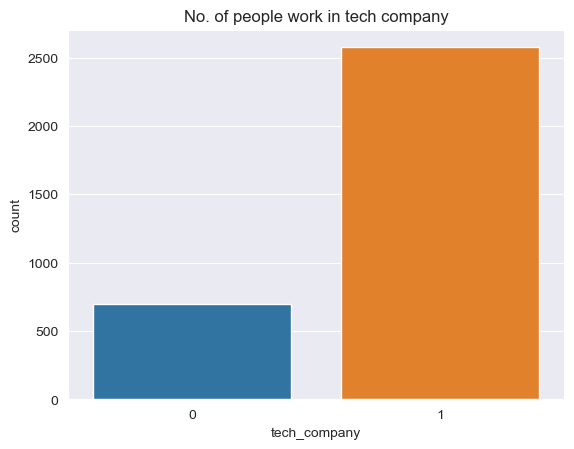

In [182]:
sns.countplot(data=df, x="tech_company")
plt.title("No. of people work in tech company")

Text(0.5, 1.0, 'No. of people who discuss mental health')

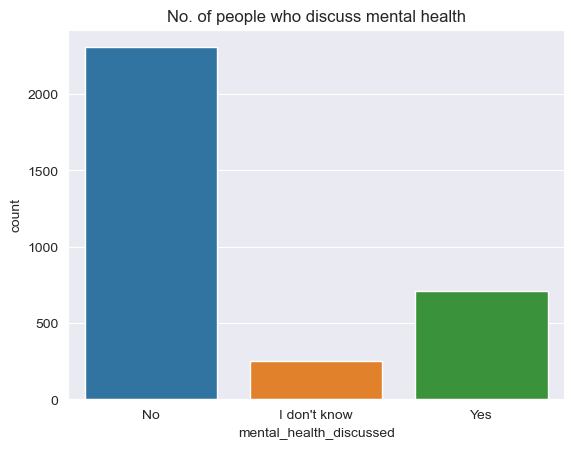

In [183]:
sns.countplot(data=df, x="mental_health_discussed")
plt.title("No. of people who discuss mental health")

- So according to graph very less no. of people discuss about mental health

Text(0.5, 1.0, 'Anonimity about mental health')

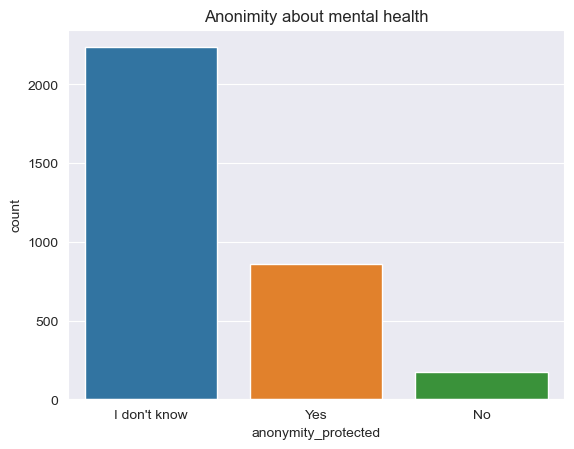

In [184]:
sns.countplot(data=df, x="anonymity_protected")
plt.title("Anonimity about mental health")

- According to graph most of people are not aware about whether anonimity about mental health protected or not.

Text(0, 0.5, 'Average Age')

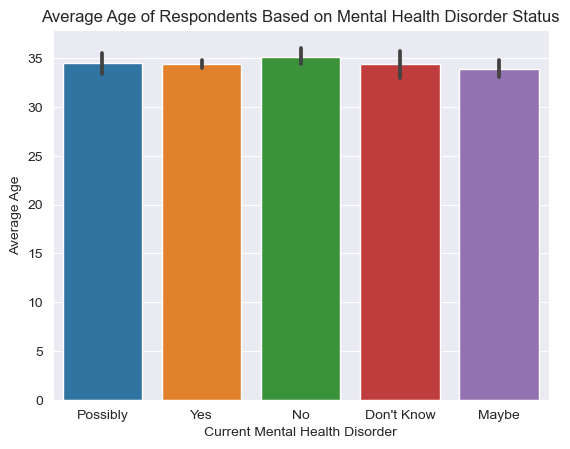

In [185]:
# Bar plot comparing average age based on current mental health disorder status
sns.barplot(data=df, x='current_mental_disorder', y='age', estimator='mean')
plt.title('Average Age of Respondents Based on Mental Health Disorder Status')
plt.xlabel('Current Mental Health Disorder')
plt.ylabel('Average Age')

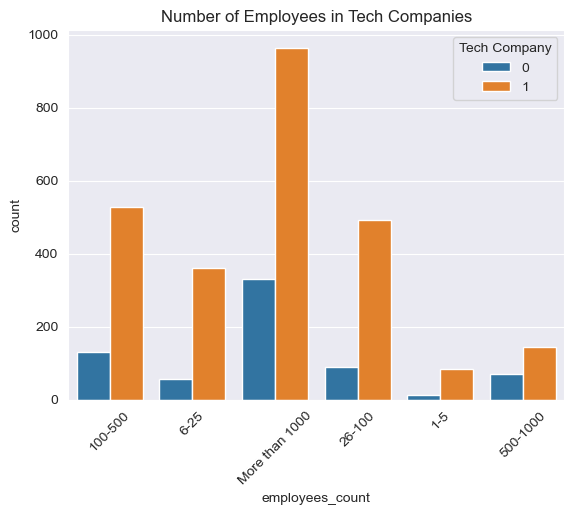

In [186]:
sns.countplot(data=df, x='employees_count', hue='tech_company')
plt.title('Number of Employees in Tech Companies')
plt.xticks(rotation=45)
plt.legend(title='Tech Company')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '10'),
  Text(3, 0, '8'),
  Text(4, 0, '3'),
  Text(5, 0, '6'),
  Text(6, 0, '2'),
  Text(7, 0, '9'),
  Text(8, 0, '7'),
  Text(9, 0, '1'),
  Text(10, 0, '0'),
  Text(11, 0, 'Somewhat open'),
  Text(12, 0, 'Neutral'),
  Text(13, 0, 'Not applicable to me (I do not have a mental illness)'),
  Text(14, 0, 'Very open'),
  Text(15, 0, 'Not open at all'),
  Text(16, 0, 'Somewhat not open')])

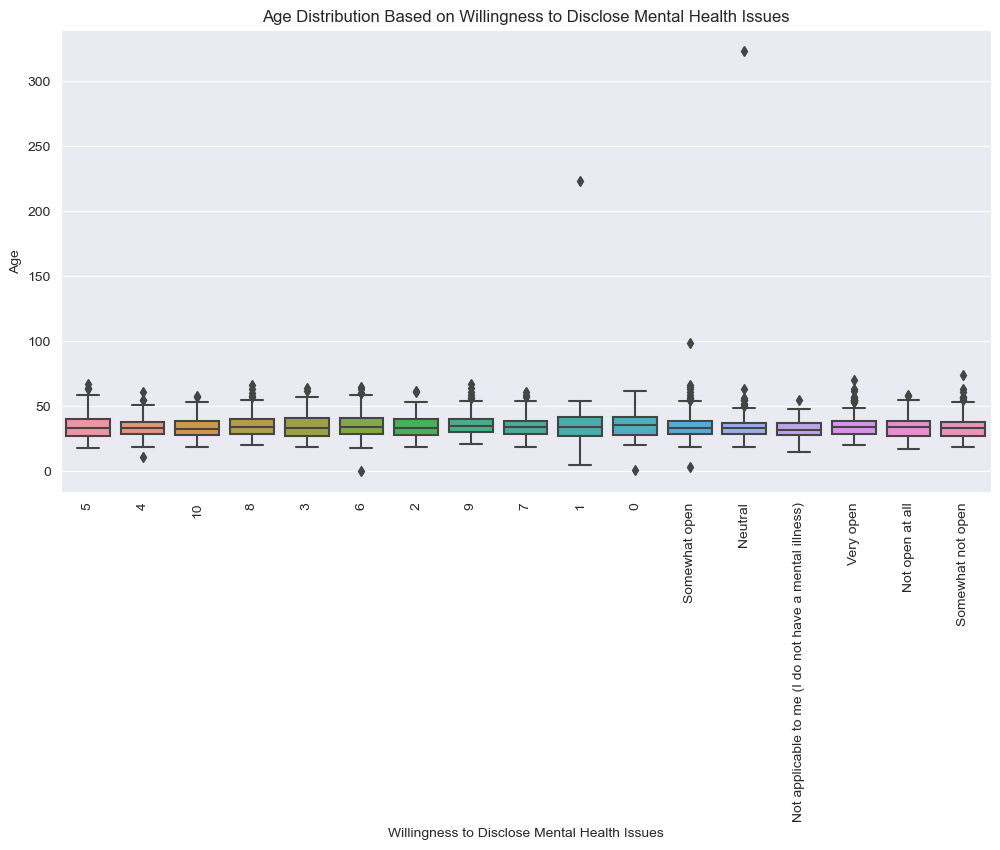

In [187]:
# Box plot for age based on willingness to disclose mental health issues
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='willing_mental_health_disclosure', y='age')
plt.title('Age Distribution Based on Willingness to Disclose Mental Health Issues')
plt.xlabel('Willingness to Disclose Mental Health Issues')
plt.ylabel('Age')
plt.xticks(rotation=90)


In [188]:
def categorize_reasons(reason):
    if 'stigma' in reason.lower():
        return 'Stigma'
    elif 'fear' in reason.lower() or 'worried' in reason.lower():
        return 'Fear of Discrimination'
    elif 'not relevant' in reason.lower():
        return 'Not Relevant'
    else:
        return 'Other'

# Apply the function to reason_1 and reason_2
df['reason_1_grouped'] = df['reason_1'].apply(categorize_reasons)
df['reason_2_grouped'] = df['reason_2'].apply(categorize_reasons)

In [189]:
df.head()

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,reason_1,reason_2,age,reason_1_grouped,reason_2_grouped
0,100-500,1,No,I don't know,Some did,"Yes, always",Possibly,Possibly,No,5,Yes,Fear of discrimination,I'd be worried they wouldn't hire me,27.0,Fear of Discrimination,Fear of Discrimination
1,100-500,1,No,I don't know,None did,I don't know,Possibly,Possibly,No,4,Yes,it may require specific measures to accomodate...,mental health issues are stigmatised and misun...,31.0,Other,Stigma
2,6-25,1,I don't know,Yes,None did,I don't know,Yes,Yes,Yes,5,Maybe,I will sometimes bring up my psoriasis just as...,stigma,36.0,Other,Stigma
3,More than 1000,1,I don't know,Yes,None did,I don't know,Yes,No,I don't know,10,No,Anything that may hurt my chances to be hired ...,Might hurt my chances,22.0,Other,Other
4,More than 1000,1,No,I don't know,None did,"Yes, always",No,Yes,Yes,10,Maybe,It depends. it's not something you start with ...,Don't think it's connected to the job. You do ...,52.0,Other,Other


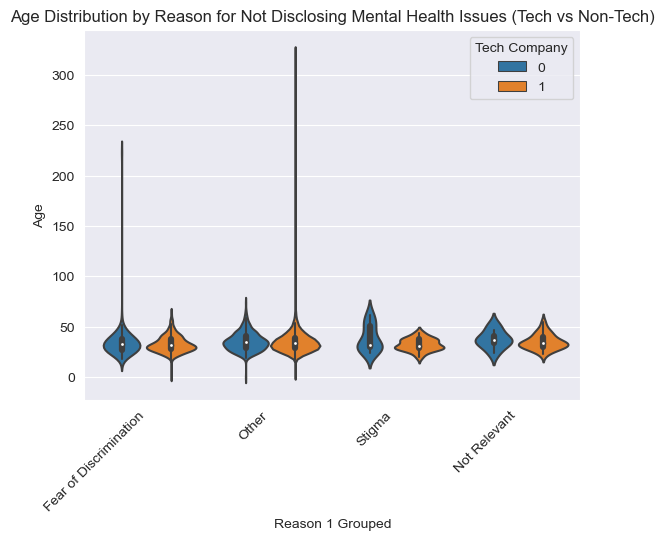

In [190]:
# Violin plot for age distribution based on reasons and tech_company
sns.violinplot(data=df, x='reason_1_grouped', y='age', hue='tech_company')

plt.title('Age Distribution by Reason for Not Disclosing Mental Health Issues (Tech vs Non-Tech)')
plt.xlabel('Reason 1 Grouped')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tech Company', loc='upper right')

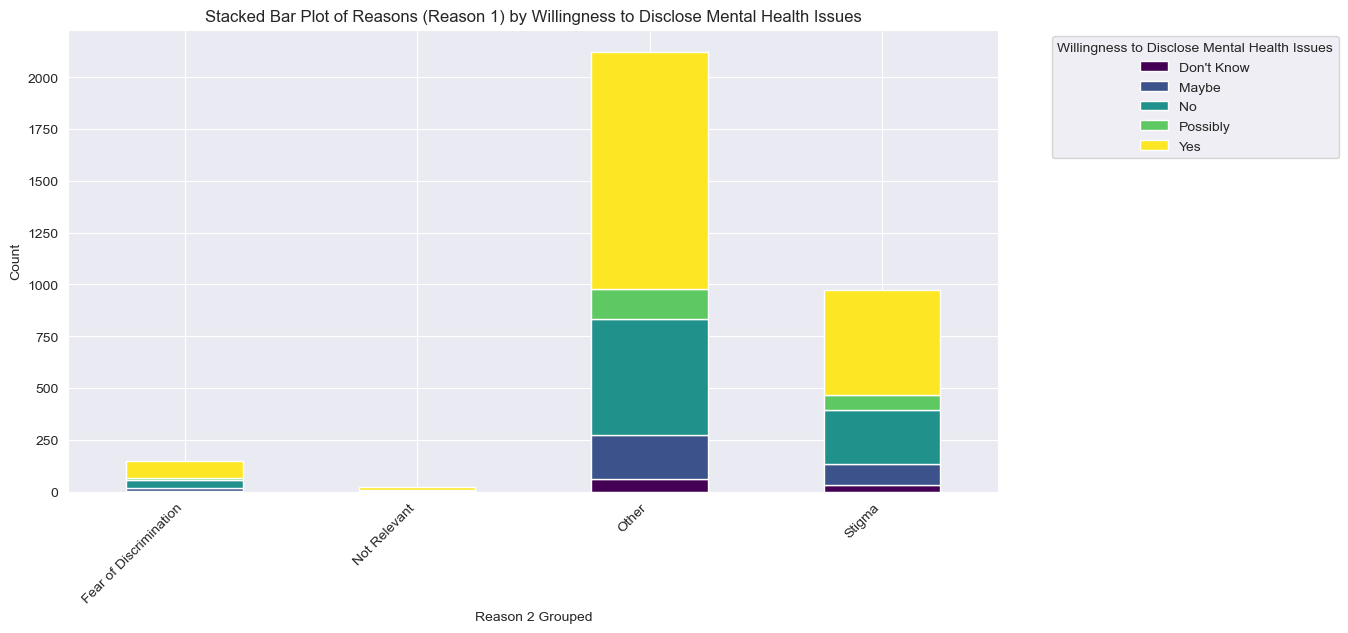

In [191]:
# Create a crosstab of reason_1_grouped vs willing_mental_health_disclosure
reason_2_vs_willing = pd.crosstab(df['reason_2_grouped'], df['current_mental_disorder'])

# Plot the stacked bar plot
reason_2_vs_willing.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Stacked Bar Plot of Reasons (Reason 1) by Willingness to Disclose Mental Health Issues')
plt.xlabel('Reason 2 Grouped')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness to Disclose Mental Health Issues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

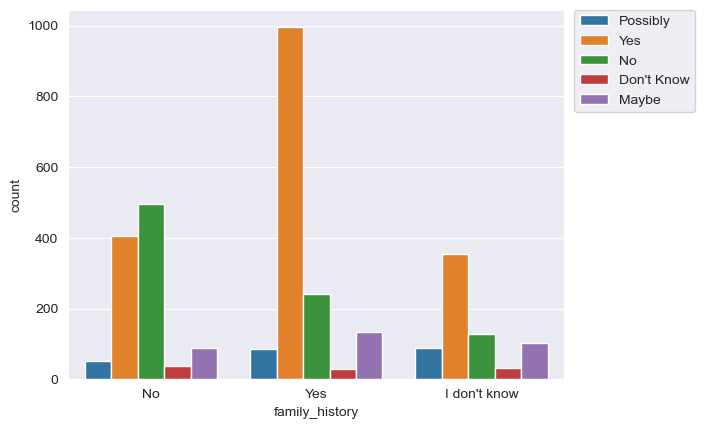

In [192]:
# current mental health based on family history
sns.set_style('darkgrid')
sns.countplot(x='family_history', hue= 'current_mental_disorder', data= df )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

- From above graph the person with family history of mental illness likely to have mental illness.

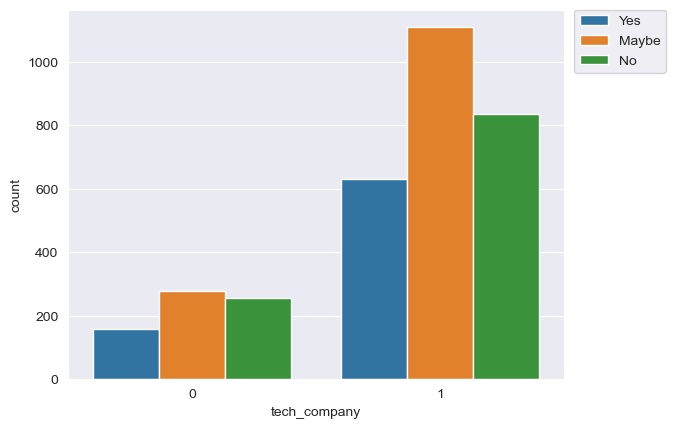

In [193]:
# Willing to share physical disorder based on company type
sns.set_style('darkgrid')
sns.countplot(x='tech_company', hue= 'willing_physical_health_disclosure', data= df )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### Converting categorical columns into numerical

In [194]:
df["employees_count"].unique()
replace_dict = {'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5}
df['employees_count'] = df['employees_count'].replace(replace_dict)

In [195]:
df["mental_health_discussed"].unique()
replace_dict = {'No':0,'Yes':1,'I don\'t know':2}
df['mental_health_discussed'] = df['mental_health_discussed'].replace(replace_dict)

In [196]:
df["anonymity_protected"].unique()
replace_dict = {'No':0,'Yes':1,'I don\'t know':2}
df['anonymity_protected'] = df['anonymity_protected'].replace(replace_dict)

In [197]:
df["prev_mental_health_discussed"].unique()
replace_dict = {'None did':0,'Yes, they all did':1,'I don\'t know':2,'Some did':3}
df['prev_mental_health_discussed'] = df['prev_mental_health_discussed'].replace(replace_dict)

In [198]:
df["prev_anonymity_protected"].unique()
replace_dict = {'No':0,'Yes, always':1,'I don\'t know':2,'Sometimes':3}
df['prev_anonymity_protected'] = df['prev_anonymity_protected'].replace(replace_dict)

In [199]:
df["current_mental_disorder"].unique()
replace_dict = {'No':0,'Yes':1,'Don\'t Know':2,'Maybe':3,'Possibly':3}
df['current_mental_disorder'] = df['current_mental_disorder'].replace(replace_dict)

In [200]:
df["past_mental_disorder"].unique()
replace_dict = {'No':0,'Yes':1,'Don\'t Know':2,'Maybe':3,'Possibly':3}
df['past_mental_disorder'] = df['past_mental_disorder'].replace(replace_dict)

In [201]:
df["family_history"].unique()
replace_dict = {'No':0,'Yes':1,'I don\'t know':2}
df['family_history'] = df['family_history'].replace(replace_dict)

In [202]:
df["willing_mental_health_disclosure"].unique()
replace_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'Somewhat open':3,'Neutral':5,
                'Not applicable to me (I do not have a mental illness)':0,'Very open':10,'Not open at all':0,'Somewhat not open':0}
df['willing_mental_health_disclosure'] = df['willing_mental_health_disclosure'].replace(replace_dict)

In [203]:
df["willing_physical_health_disclosure"].unique()
replace_dict = {'No':0,'Yes':1,'Maybe':2}
df['willing_physical_health_disclosure'] = df['willing_physical_health_disclosure'].replace(replace_dict)

In [204]:
df["reason_1_grouped"].unique()
replace_dict = {'Not Relevant':0,'Fear of Discrimination':1,'Stigma':2,'Other':3}
df['reason_1_grouped'] = df['reason_1_grouped'].replace(replace_dict)

In [205]:
df["reason_2_grouped"].unique()
replace_dict = {'Not Relevant':0,'Fear of Discrimination':1,'Stigma':2,'Other':3}
df['reason_2_grouped'] = df['reason_2_grouped'].replace(replace_dict)

In [206]:
df = df.drop(['reason_1'], axis= 1)

In [207]:
df = df.drop(['reason_2'], axis= 1)

In [208]:
df.head()

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,age,reason_1_grouped,reason_2_grouped
0,3,1,0,2,3,1,3,3,0,5,1,27.0,1,1
1,3,1,0,2,0,2,3,3,0,4,1,31.0,3,2
2,1,1,2,1,0,2,1,1,1,5,2,36.0,3,2
3,5,1,2,1,0,2,1,0,2,10,0,22.0,3,3
4,5,1,0,2,0,1,0,1,1,10,2,52.0,3,3


In [209]:
# check the info of data frame after scaling
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employees_count,3269.0,3.334353,1.581095,0.0,2.0,3.0,5.0,5.0
tech_company,3269.0,0.787703,0.408997,0.0,1.0,1.0,1.0,1.0
mental_health_discussed,3269.0,0.371673,0.622757,0.0,0.0,0.0,1.0,2.0
anonymity_protected,3269.0,1.631080,0.582035,0.0,1.0,2.0,2.0,2.0
prev_mental_health_discussed,3269.0,0.703885,1.205526,0.0,0.0,0.0,1.0,3.0
prev_anonymity_protected,3269.0,1.784644,0.687444,0.0,2.0,2.0,2.0,3.0
current_mental_disorder,3269.0,1.103701,0.980196,0.0,0.0,1.0,1.0,3.0
past_mental_disorder,3269.0,1.088406,1.025896,0.0,0.0,1.0,1.0,3.0
family_history,3269.0,0.884674,0.729582,0.0,0.0,1.0,1.0,2.0
willing_mental_health_disclosure,3269.0,5.167635,3.330166,0.0,3.0,5.0,8.0,10.0


In [210]:
# check the first few columns of the df
df.head().T

,0,1,2,3,4
employees_count,3.0,3.0,1.0,5.0,5.0
tech_company,1.0,1.0,1.0,1.0,1.0
mental_health_discussed,0.0,0.0,2.0,2.0,0.0
anonymity_protected,2.0,2.0,1.0,1.0,2.0
prev_mental_health_discussed,3.0,0.0,0.0,0.0,0.0
prev_anonymity_protected,1.0,2.0,2.0,2.0,1.0
current_mental_disorder,3.0,3.0,1.0,1.0,0.0
past_mental_disorder,3.0,3.0,1.0,0.0,1.0
family_history,0.0,0.0,1.0,2.0,1.0
willing_mental_health_disclosure,5.0,4.0,5.0,10.0,10.0


In [211]:
# check data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employees_count                     3269 non-null   int64  
 1   tech_company                        3269 non-null   int64  
 2   mental_health_discussed             3269 non-null   int64  
 3   anonymity_protected                 3269 non-null   int64  
 4   prev_mental_health_discussed        3269 non-null   int64  
 5   prev_anonymity_protected            3269 non-null   int64  
 6   current_mental_disorder             3269 non-null   int64  
 7   past_mental_disorder                3269 non-null   int64  
 8   family_history                      3269 non-null   int64  
 9   willing_mental_health_disclosure    3269 non-null   int64  
 10  willing_physical_health_disclosure  3269 non-null   int64  
 11  age                                 3269 no

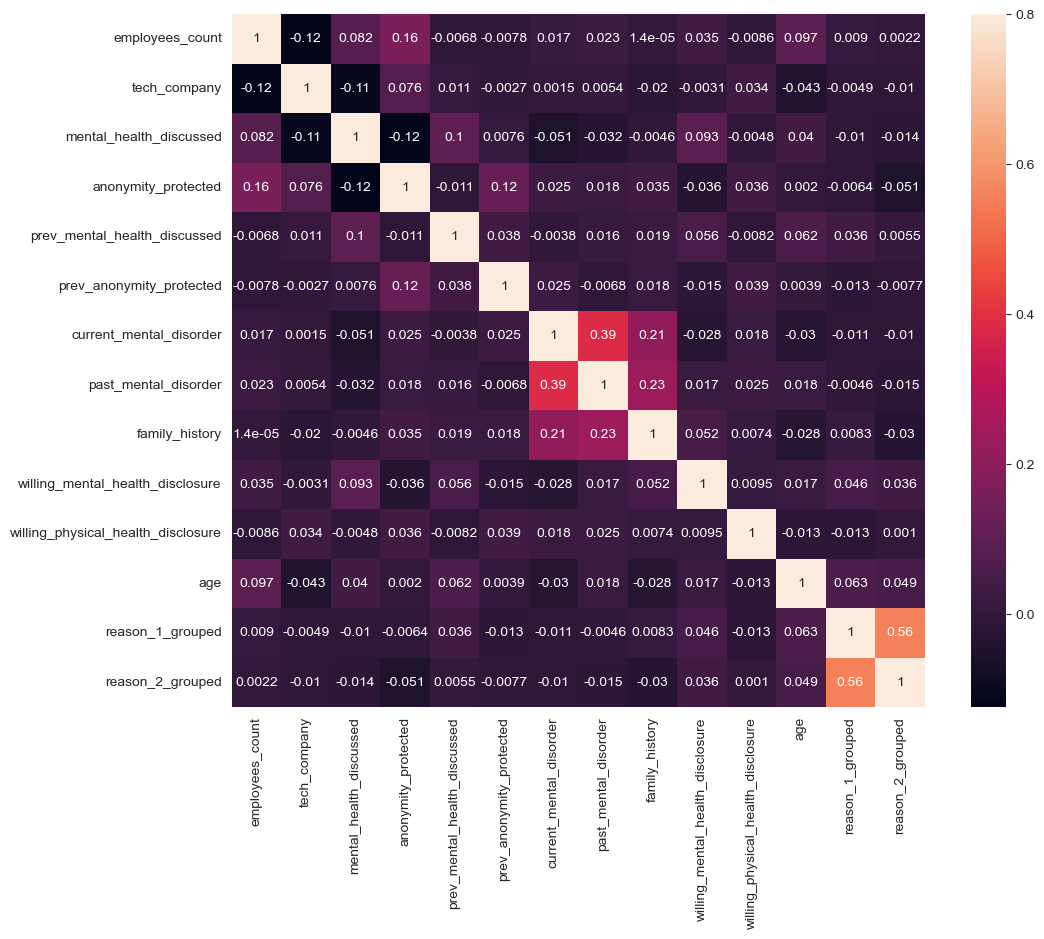

In [212]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

1. Highly Correlated Features:

- The strongest correlation is observed between reason_1_grouped and reason_2_grouped (correlation = 0.56). This suggests that these variables are related, and their inclusion together in predictive models might introduce multicollinearity.
- current_mental_disorder and past_mental_disorder show a moderately strong positive correlation (correlation = 0.39), indicating that individuals with a history of mental disorders are more likely to report current mental health issues.

2. Weak or Negligible Correlations:

- Most other variables have correlations close to 0, implying weak or no linear relationship.
- For instance, employees_count has very low correlations with most other variables, suggesting that the size of the company might not strongly influence mental health discussions or related factors.

3. family_history shows weak positive correlations with both current_mental_disorder (0.21) and past_mental_disorder (0.23). This is consistent with the idea that family history may slightly influence mental health outcomes.


4. willing_mental_health_disclosure has a weak positive correlation with mental_health_discussed (0.093), which might suggest that openness about discussing mental health slightly correlates with the willingness to disclose related issues.


5. The heatmap suggests that the relationships in the dataset are generally weak, highlighting the need for more advanced modeling techniques (like feature engineering or non-linear methods) to uncover complex patterns.

## Clustering

###  K-Means

In [213]:
# preprocessing and clustering library
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler

In [214]:
df.columns

Index(['employees_count', 'tech_company', 'mental_health_discussed',
       'anonymity_protected', 'prev_mental_health_discussed',
       'prev_anonymity_protected', 'current_mental_disorder',
       'past_mental_disorder', 'family_history',
       'willing_mental_health_disclosure',
       'willing_physical_health_disclosure', 'age', 'reason_1_grouped',
       'reason_2_grouped'],
      dtype='object')

In [215]:
features = ['employees_count', 'tech_company', 'mental_health_discussed',
       'anonymity_protected', 'prev_mental_health_discussed',
       'prev_anonymity_protected', 'current_mental_disorder',
       'past_mental_disorder', 'family_history',
       'willing_mental_health_disclosure',
       'willing_physical_health_disclosure', 'age', 'reason_1_grouped',
       'reason_2_grouped']

In [216]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,age,reason_1_grouped,reason_2_grouped
0,0.6,1.0,0.0,1.0,1.0,0.333333,1.000000,1.000000,0.0,0.5,0.5,0.083591,0.333333,0.333333
1,0.6,1.0,0.0,1.0,0.0,0.666667,1.000000,1.000000,0.0,0.4,0.5,0.095975,1.000000,0.666667
2,0.2,1.0,1.0,0.5,0.0,0.666667,0.333333,0.333333,0.5,0.5,1.0,0.111455,1.000000,0.666667
3,1.0,1.0,1.0,0.5,0.0,0.666667,0.333333,0.000000,1.0,1.0,0.0,0.068111,1.000000,1.000000
4,1.0,1.0,0.0,1.0,0.0,0.333333,0.000000,0.333333,0.5,1.0,1.0,0.160991,1.000000,1.000000


In [217]:
# Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_

In [218]:
# Check the clusters assigned
print("DataFrame with Clusters:")
df.head()



DataFrame with Clusters:


,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,age,reason_1_grouped,reason_2_grouped,Cluster
0,3,1,0,2,3,1,3,3,0,5,1,27.0,1,1,0
1,3,1,0,2,0,2,3,3,0,4,1,31.0,3,2,0
2,1,1,2,1,0,2,1,1,1,5,2,36.0,3,2,0
3,5,1,2,1,0,2,1,0,2,10,0,22.0,3,3,1
4,5,1,0,2,0,1,0,1,1,10,2,52.0,3,3,0


<Axes: xlabel='age', ylabel='current_mental_disorder'>

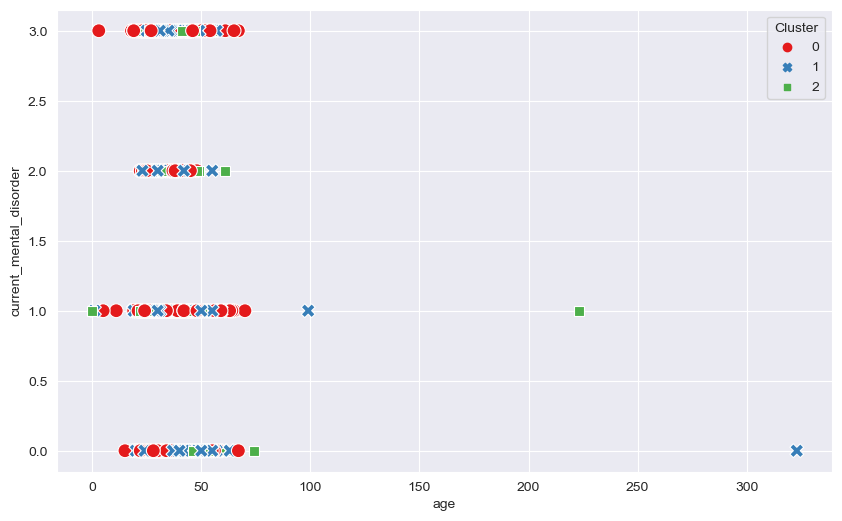

In [220]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='current_mental_disorder', hue='Cluster', palette='Set1', style='Cluster', s=100)



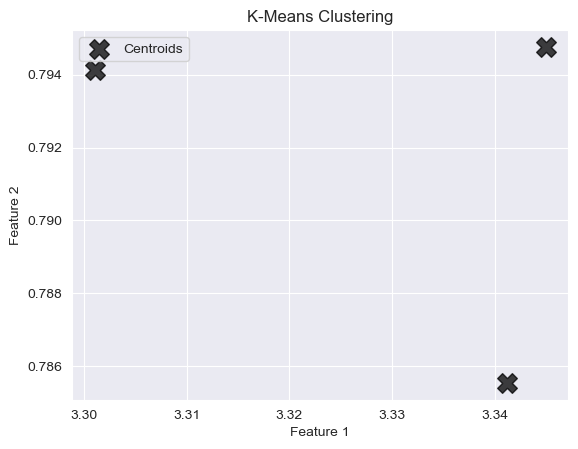

In [104]:
# Plot the centroids
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Running K-Means with StandardScaler...


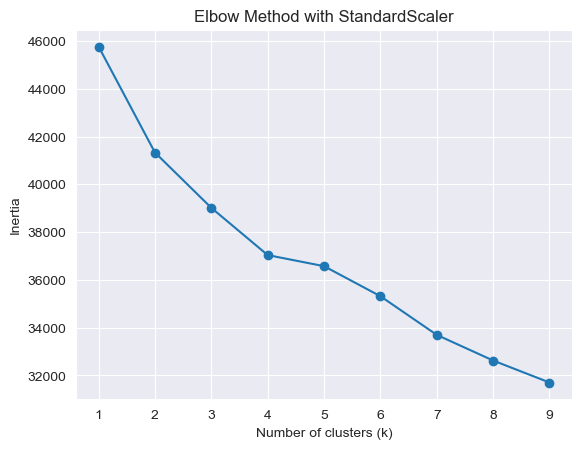

Running K-Means with MinMaxScaler...


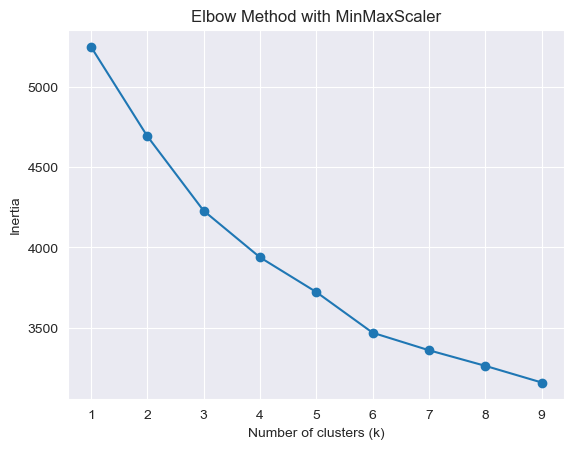

Running K-Means with RobustScaler...


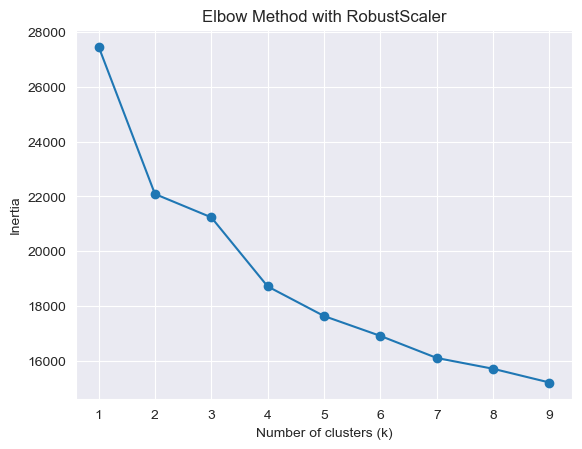

,employees_count,tech_company,mental_health_discussed,anonymity_protected,prev_mental_health_discussed,prev_anonymity_protected,current_mental_disorder,past_mental_disorder,family_history,willing_mental_health_disclosure,willing_physical_health_disclosure,age,reason_1_grouped,reason_2_grouped,cluster_StandardScaler,cluster_MinMaxScaler,cluster_RobustScaler
0,3,1,0,2,3,1,3,3,0,5,1,27.0,1,1,2,2,2
1,3,1,0,2,0,2,3,3,0,4,1,31.0,3,2,0,0,0
2,1,1,2,1,0,2,1,1,1,5,2,36.0,3,2,1,1,0
3,5,1,2,1,0,2,1,0,2,10,0,22.0,3,3,1,1,0
4,5,1,0,2,0,1,0,1,1,10,2,52.0,3,3,1,1,0


In [53]:
# Select relevant columns
df = df[['employees_count', 'tech_company', 'mental_health_discussed',
         'anonymity_protected', 'prev_mental_health_discussed', 
         'prev_anonymity_protected', 'current_mental_disorder', 
         'past_mental_disorder', 'family_history', 
         'willing_mental_health_disclosure', 'willing_physical_health_disclosure', 
         'age', 'reason_1_grouped', 'reason_2_grouped']]

# Define a list of scalers to experiment with
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Apply each scaler and then perform K-Means clustering
for scaler_name, scaler in scalers.items():
    print(f"Running K-Means with {scaler_name}...")

    # Scale the data
    scaled_df = scaler.fit_transform(df)

    # Perform K-Means clustering (you can tune the number of clusters 'k')
    kmeans = KMeans(n_clusters=3, random_state=42)  # you can adjust the number of clusters
    kmeans.fit(scaled_df)
    
    # Assign the clusters back to the DataFrame
    df[f'cluster_{scaler_name}'] = kmeans.labels_
    
    # Plot the inertia (elbow method) to determine the optimal number of clusters
    inertia_values = []
    k_values = range(1, 10)  # range for k to explore
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_df)
        inertia_values.append(kmeans.inertia_)
    
    # Plot inertia for elbow method
    plt.plot(k_values, inertia_values, marker='o')
    plt.title(f'Elbow Method with {scaler_name}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Display the DataFrame with the clusters
df.head()


- K-Means with StandardScaler :- Elbow point 4
- K-Means with MinMaxScaler :- Elbow point 6
- K-Means with RobustScaler :- Elbow point [2,4]